In [62]:
#from google.colab import files
#uploaded = files.upload()


# 1. Data description

## 1.1. Libraries import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC



In [2]:
data = pd.read_csv('data.csv', encoding='latin', low_memory=False)
data = pd.DataFrame(data)

In [3]:
data.head()

,gesture_id,tap,app_name,origin_first_finger,pressure_first_finger,time_stamp_first,size_first_finger,x_coordinate_first_finger,y_coordinate_first_finger,distance,iskid
0,76,Tap,NaN,False,42,1504800509763,4.0,326,944,0.0,1
1,33,Tap,NaN,False,30,1504192489823,4.0,158,1535,0.0,1
2,37,Swipe,com.google.android.apps.photos,True,39,1507562393497,3.0,1192,1303,0.0,0
3,82,Tap,com.mehequanna.gestureplayground,False,43,1504800515915,4.0,154,1491,0.0,1
4,43,Swipe,com.google.android.apps.photos,True,56,1500219771288,7.0,624,1477,0.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17072 entries, 0 to 17071
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gesture_id                 17072 non-null  int64  
 1   tap                        17072 non-null  object 
 2   app_name                   10101 non-null  object 
 3   origin_first_finger        17072 non-null  bool   
 4   pressure_first_finger      17072 non-null  int64  
 5   time_stamp_first           17072 non-null  int64  
 6   size_first_finger          17069 non-null  float64
 7   x_coordinate_first_finger  17072 non-null  int64  
 8   y_coordinate_first_finger  17072 non-null  int64  
 9   distance                   17072 non-null  float64
 10  iskid                      17072 non-null  int64  
dtypes: bool(1), float64(2), int64(6), object(2)
memory usage: 1.3+ MB


## 1.2. Unique values discovery

In [5]:
for column in data.columns:
    # Print the column name and its unique values
    print(f"Column '{column}': {data[column].unique()}")

Column 'gesture_id': [ 76  33  37  82  43 157 116 326  59 258 164  77 261  30 109  17 131  46
 108 184 124  42  38 125  23  32 127  65  75 182 199 277 186 197 294 137
 372 216 272 273 270 174  52 238 491  16 352 135   6 388  79 301 225 122
 101 232 256  95 144 130 202 177  56 212 247  99 214  94 323 269 159 330
 166 138 246  69 207  88 198 162 196  57 206 396 222 466  66 318   4 282
  11 224  74 151 268  93 291 154 440 105  50 193 179 227 252 493 283  98
  92   2 106 107 341 185 201 373  20  72 236  84  19 254  10 335 336 299
 191 262 295  83  70 161 347 255  87 155 304  64 321 200 150 469 417 239
 143 121  18 100 215 213 183 509 281 271 118  80 158  12 260  34 156 296
  78 366 259  27  89  68 251   5 237 226 165  51 163 387 204 175  54 241
 263 257 292 390  24 242 145 332  40 446  41 168 288 284 327 278 173  26
 245  97 104 359 248 208 187 307  53 454 353 148  21 169 172 210  71 460
   7 140 315 306 274 369 356  47 279 334 211 538 322 102 266  58 146 123
 205 170 264 233 358  13 445 1

# 2. Data preprocesssig

## 2.1. Data cleaning

In [6]:
# Count the number of nan values for each feature
nan_counts = data.isna().sum()
print("NaN values in each column:")
print(nan_counts)


NaN values in each column:
gesture_id                      0
tap                             0
app_name                     6971
origin_first_finger             0
pressure_first_finger           0
time_stamp_first                0
size_first_finger               3
x_coordinate_first_finger       0
y_coordinate_first_finger       0
distance                        0
iskid                           0
dtype: int64


* app_name has a lot of null values

In [7]:
# Replace NaN values in the 'app name' column with 'Other'
data['app_name'].fillna('Other', inplace=True)


In [70]:
# Count the number of NaN values in each column
nan_counts = data.isna().sum()

# Print the number of NaN values for each column
print("NaN values in each column:")
print(nan_counts)

NaN values in each column:
gesture_id                   0
tap                          0
app_name                     0
origin_first_finger          0
pressure_first_finger        0
time_stamp_first             0
size_first_finger            3
x_coordinate_first_finger    0
y_coordinate_first_finger    0
distance                     0
iskid                        0
dtype: int64


In [71]:
# Drop null values
data = data.dropna()
print(data.isna().sum())


gesture_id                   0
tap                          0
app_name                     0
origin_first_finger          0
pressure_first_finger        0
time_stamp_first             0
size_first_finger            0
x_coordinate_first_finger    0
y_coordinate_first_finger    0
distance                     0
iskid                        0
dtype: int64


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17069 entries, 0 to 17071
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gesture_id                 17069 non-null  int64  
 1   tap                        17069 non-null  object 
 2   app_name                   17069 non-null  object 
 3   origin_first_finger        17069 non-null  bool   
 4   pressure_first_finger      17069 non-null  int64  
 5   time_stamp_first           17069 non-null  int64  
 6   size_first_finger          17069 non-null  float64
 7   x_coordinate_first_finger  17069 non-null  int64  
 8   y_coordinate_first_finger  17069 non-null  int64  
 9   distance                   17069 non-null  float64
 10  iskid                      17069 non-null  int64  
dtypes: bool(1), float64(2), int64(6), object(2)
memory usage: 1.4+ MB


## 2.2. Data Visualisation

### 2.2.1. Target visualization (IsKid)

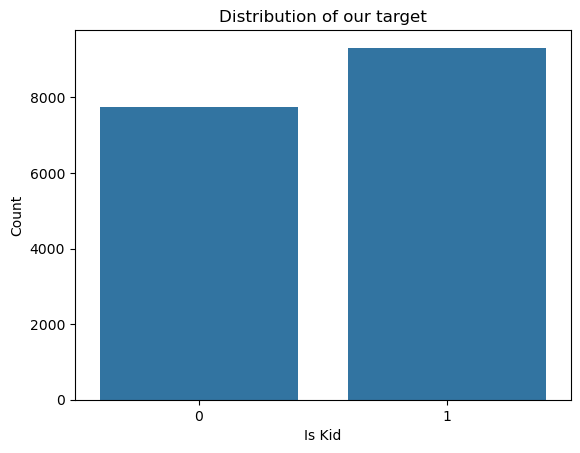

In [73]:
# Plot the distribution of the column 'iskid'
sns.countplot(x='iskid', data=data)
plt.xlabel('Is Kid')
plt.ylabel('Count')
plt.title('Distribution of our target')
plt.show()


* IsKiD is our target
* If it has 1 ; it's a kid
* else it's a parent

In [74]:
# Print possible values of the 'tap' column
print("Possible values of 'tap':")
print(data['tap'].value_counts())

# Print possible values of the 'app_name' column
print("\nPossible values of 'app_name':")
print(data['app_name'].value_counts())

# Print possible values of the 'origin_first_finger' column
print("\nPossible values of 'origin_first_finger':")
print(data['origin_first_finger'].value_counts())


Possible values of 'tap':
tap
Swipe           7036
Tap             7028
Unidentified    2660
Scroll           198
TwoFinger        116
LongPress         31
Name: count, dtype: int64

Possible values of 'app_name':
app_name
Other                                      6970
com.google.android.apps.photos             6843
com.mehequanna.gestureplayground           1369
com.google.android.youtube                 1056
com.google.android.googlequicksearchbox     618
com.touchlogger                             159
com.android.systemui                         15
com.android.vending                           7
com.appvv.os9launcherhd                       7
com.talkatone.android                         6
com.google.android.gms                        5
com.android.chrome                            4
com.google.android.calendar                   3
com.google.android.apps.magazines             2
com.isispoly.DemoDrawAPIN                     2
com.google.android.GoogleCamera               1
com.andro

### 2.2.2. Gesture Type visualization (Tap column)

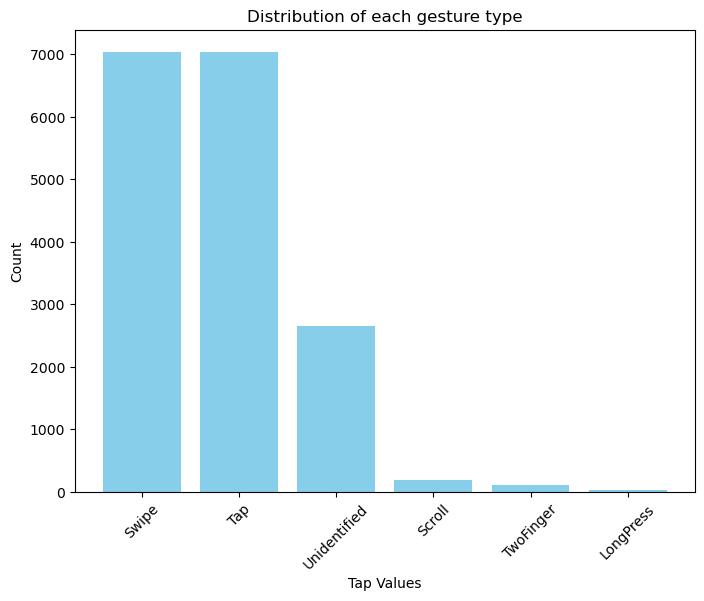

In [75]:
tap_counts = data['tap'].value_counts()

plt.figure(figsize=(8, 6))

plt.bar(tap_counts.index, tap_counts.values, color='skyblue')

plt.xlabel('Tap Values')
plt.ylabel('Count')
plt.title('Distribution of each gesture type')
plt.xticks(rotation=45)

plt.show()

### 2.2.3. Visualization of top 7 used applications

app_name
Other                             6970
com.google.android.apps.photos    6843
Name: count, dtype: int64


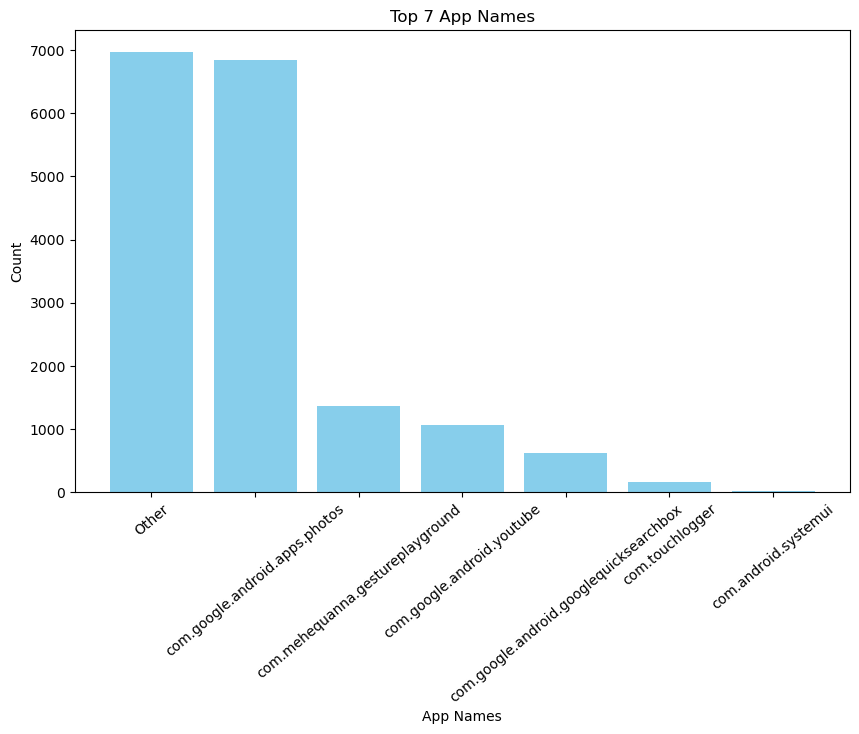

In [76]:
app_name_counts = data['app_name'].value_counts()

# Get top 7 values
top_7_app_names = app_name_counts.head(7)
print(app_name_counts.head(2))
# Plot
plt.figure(figsize=(10, 6))

plt.bar(top_7_app_names.index, top_7_app_names.values, color='skyblue')

plt.xlabel('App Names')
plt.ylabel('Count')
plt.title('Top 7 App Names')
plt.xticks(rotation=40)

plt.show()

### 2.2.4. Origin_First_finger_visualization

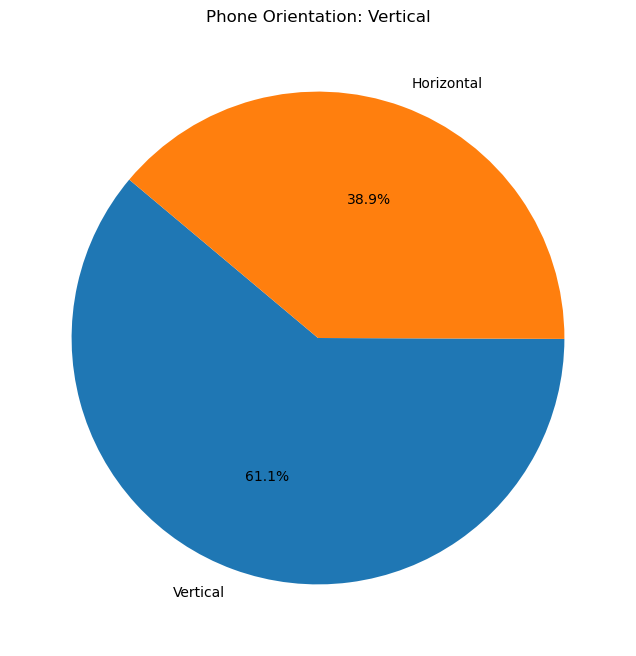

In [77]:
origin_first_finger_counts = data['origin_first_finger'].value_counts()
plt.figure(figsize=(8, 8))

labels = ['Horizontal', 'Vertical'] if origin_first_finger_counts.index[0] == False else ['Vertical', 'Horizontal']
sizes = origin_first_finger_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Phone Orientation: ' + labels[0])

plt.show()

## 2.3. Encoding

In [78]:
data_e = data.copy()
label_encoder = LabelEncoder()
data_e['tap'] = label_encoder.fit_transform(data_e['tap'])
data_e['app_name'] = label_encoder.fit_transform(data_e['app_name'])
data_e['origin_first_finger'] = label_encoder.fit_transform(data_e['origin_first_finger'])


In [79]:
data_e.drop(columns=['gesture_id'], inplace=True)
print(data_e)

       tap  app_name  origin_first_finger  pressure_first_finger  \
0        3         0                    0                     42   
1        3         0                    0                     30   
2        2         8                    1                     39   
3        3        15                    0                     43   
4        2         8                    1                     56   
...    ...       ...                  ...                    ...   
17067    2         8                    1                     25   
17068    3        15                    0                     55   
17069    2         8                    1                     55   
17070    3         8                    1                     26   
17071    3         0                    0                     48   

       time_stamp_first  size_first_finger  x_coordinate_first_finger  \
0         1504800509763                4.0                        326   
1         1504192489823              

## 2.4. Coorelation matrix

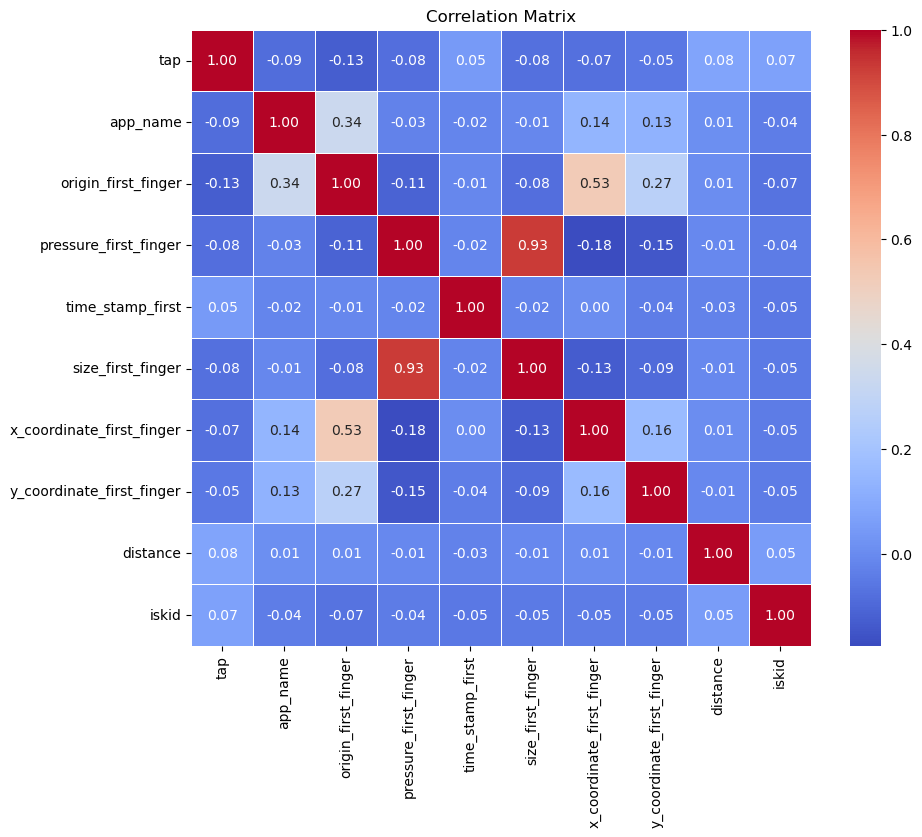

In [80]:
correlation_matrix = data_e.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# 3.Data processing

## 3.1. Data split

In [81]:
X = data_e.drop(columns=['iskid'])
y = data_e['iskid']

In [82]:
X

,tap,app_name,origin_first_finger,pressure_first_finger,time_stamp_first,size_first_finger,x_coordinate_first_finger,y_coordinate_first_finger,distance
0,3,0,0,42,1504800509763,4.0,326,944,0.0
1,3,0,0,30,1504192489823,4.0,158,1535,0.0
2,2,8,1,39,1507562393497,3.0,1192,1303,0.0
3,3,15,0,43,1504800515915,4.0,154,1491,0.0
4,2,8,1,56,1500219771288,7.0,624,1477,0.0
...,...,...,...,...,...,...,...,...,...
17067,2,8,1,25,1504204183097,2.0,952,1491,0.0
17068,3,15,0,55,1504720432749,6.0,588,1535,0.0
17069,2,8,1,55,1504193922230,5.0,919,1558,0.0
17070,3,8,1,26,1504798428016,2.0,1274,1479,0.0


In [83]:
y

0        1
1        1
2        0
3        1
4        0
        ..
17067    0
17068    0
17069    1
17070    1
17071    1
Name: iskid, Length: 17069, dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=30)

## 3.2. Machine Learning

### 3.2.1. KNN

In [85]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

### 3.2.2. Random Forest

In [86]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### 3.2.3. Decision Tree

In [87]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

### 3.2.4. SVM

In [88]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# 4. Evaluation

In [89]:
print("************** Perfomance of KNN classsifier ******************")
print(classification_report(y_test,y_pred_knn))
print("************** Perfomance of Decision tree classifier ******************")
print(classification_report(y_test,y_pred_dt))
print("************** Perfomance of SVM ******************")
print(classification_report(y_test,y_pred_svc))
print("************** Perfomance of Random Forst ******************")
print(classification_report(y_test,y_pred_rf))

************** Perfomance of KNN classsifier ******************
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1566
           1       0.98      0.99      0.99      1848

    accuracy                           0.98      3414
   macro avg       0.98      0.98      0.98      3414
weighted avg       0.98      0.98      0.98      3414

************** Perfomance of Decision tree classifier ******************
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1566
           1       0.99      0.99      0.99      1848

    accuracy                           0.99      3414
   macro avg       0.99      0.99      0.99      3414
weighted avg       0.99      0.99      0.99      3414

************** Perfomance of SVM ******************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1566
           1       0.54      1.00      0.70     

c:\Users\Hedi Aloulou\anaconda3\envs\deep\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hedi Aloulou\anaconda3\envs\deep\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hedi Aloulou\anaconda3\envs\deep\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:


cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix for K-Nearest Neighbors:")
print(pd.DataFrame(cm_knn, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))
print("\n")


cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix for Random Forest:")
print(pd.DataFrame(cm_rf, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))
print("\n")


cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix for Decision Tree:")
print(pd.DataFrame(cm_dt, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))
print("\n")


cm_svc = confusion_matrix(y_test, y_pred_svc)
print("\nConfusion Matrix for SVM :")
print(pd.DataFrame(cm_svc, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))
print("\n")


Confusion Matrix for K-Nearest Neighbors:
          Predicted 0  Predicted 1
Actual 0         1535           31
Actual 1           21         1827



Confusion Matrix for Random Forest:
          Predicted 0  Predicted 1
Actual 0         1506           60
Actual 1           67         1781



Confusion Matrix for Decision Tree:
          Predicted 0  Predicted 1
Actual 0         1556           10
Actual 1           13         1835



Confusion Matrix for SVM :
          Predicted 0  Predicted 1
Actual 0            0         1566
Actual 1            0         1848




 * Random forest , Decision tree and KNN have best accuracies
 * However svm has the lowest accuracy based on our confusion matrix
